1. Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from datetime import date, time, datetime
from operator import attrgetter
from scipy.interpolate import interp1d

2. Customer data

2.1 Importing file 

In [45]:
df_cust = pd.read_csv('customers_sample.csv', sep=';')
df_cust.head()
#df_cust.dtypes

C:\Users\ТарасоваСофияАльберт\AppData\Local\Temp\ipykernel_6184\538575721.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cust = pd.read_csv('customers_sample.csv', sep=';')


,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0


2.2 Data preparation

In [3]:
# unique values
df_cust.nunique()

uid1                       10000
customer_age                  88
country                        1
city_of_living                21
registration_dt             3086
website_last_visit_date     2489
email                          2
has_mob_app                    2
phone_number                   2
push                           2
dtype: int64

In [4]:
# dataset size
df_cust.shape

(1048575, 10)

In [46]:
# let's change registration_dt and website_last_visit_date to date formats
df_cust['registration_dt'] = pd.to_datetime(df_cust['registration_dt'], format="%d.%m.%Y")
df_cust['website_last_visit_date'] = pd.to_datetime(df_cust['website_last_visit_date'], format="%d.%m.%Y")

In [47]:
df_cust.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,2017-02-18,2019-05-01,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,2020-07-21,2021-10-03,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,2016-02-26,2018-12-24,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,2018-01-25,2018-04-16,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,2015-07-17,2016-07-30,0.0,0.0,0.0,0.0


In [48]:
# as we can see, dataset is bigger than it's actual data
# let's choose only those rows, where uid1 is not null
df_cust = df_cust[df_cust['uid1'].notna()]

In [49]:
# we have three other columns with empty values: age, registration date, web site last visit
# let's transorm them
df_cust.customer_age.fillna(df_cust.customer_age.median(), inplace=True)
df_cust.registration_dt.fillna(pd.to_datetime('01.01.2099', format="%d.%m.%Y"), inplace=True)
df_cust.website_last_visit_date.fillna(pd.to_datetime('01.01.2099', format="%d.%m.%Y"), inplace=True)

In [50]:
df_cust.shape

(10000, 10)

In [57]:
# and create month of registration
df_cust['registration_month'] = df_cust['registration_dt'] + pd.offsets.MonthBegin(-1)

3. Transaction data

3.1 Importing file

In [8]:
df_trans = pd.read_csv('transactional_data.csv', sep=',')
df_trans.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


3.2 Data preparation

In [75]:
#dataset shape
df_trans.shape

(4710501, 5)

In [45]:
# unique values
df_trans.nunique()

uid1                 9198
date_pur              651
mcc_id                314
transaction_amt    361045
transaction_qty        84
dtype: int64

In [47]:
#missing values
#no missing values
df_trans[df_trans.uid1.isna()]

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty


In [9]:
# let's change date_pur to date
df_trans['date_pur'] = pd.to_datetime(df_trans['date_pur'], format="%Y-%m-%d", errors='coerce')

In [10]:
# and create month of registration
df_trans['purchase_month'] = df_trans['date_pur'].dt.to_period('M')

4. Merging datasets

In [60]:
#choose those generations which got into our transaction dataset and were registrated
df_cust = df_cust[(df_cust.registration_month > pd.to_datetime('01.01.2020', format="%d.%m.%Y") )& (df_cust.registration_month!= pd.to_datetime('01.01.2099', format="%d.%m.%Y") )]

In [65]:
df_trans = df_trans.merge(df_cust, how = 'inner', on = 'uid1' )

5. Cohort analysis

In [105]:
#creating cohort - the month of the first transaction
df_trans['cohort'] = df_trans.groupby('uid1')['date_pur'] \
                 .transform('min') \
                 .dt.to_period('M') 

#df_trans[df_trans.uid1==6379644].sort_values(by='date_pur')

In [99]:
#as we can see value count is cohorts is very small so let's group it
df_trans.groupby('cohort').uid1.nunique()

cohort
2020-01     49
2020-02     50
2020-03     85
2020-04     37
2020-05     40
2020-06     48
2020-07     61
2020-08     70
2020-09     87
2020-10     75
2020-11     70
2020-12     67
2021-01     51
2021-02     75
2021-03     79
2021-04     89
2021-05    103
2021-06    149
2021-07    155
2021-08    221
2021-09    235
2021-10     92
Freq: M, Name: uid1, dtype: int64

In [81]:
dict_temp = {
    '2020-03': '2020.Q1',
    '2020-02': '2020.Q1', 
    '2020-01': '2020.Q1',
    '2020-04': '2020.Q2',
    '2020-05': '2020.Q2',
    '2020-06': '2020.Q2',
    '2020-07': '2020.Q3',
    '2020-08': '2020.Q3',
    '2020-09': '2020.Q3',
    '2020-10': '2020.Q4', 
    '2020-11': '2020.Q4',
    '2020-12': '2020.Q4',
    '2021-03': '2020.Q1',
    '2021-02': '2021.Q1', 
    '2021-01': '2021.Q1',
    '2021-04': '2021.Q2',
    '2021-05': '2021.Q2',
    '2021-06': '2021.Q2',
    '2021-07': '2021.Q3',
    '2021-08': '2021.Q3',
    '2021-09': '2021.Q3',
    '2021-10': '2021.Q4', 
    '2021-11': '2021.Q4',
    '2021-12': '2021.Q4'}


0    07
1    07
2    07
3    07
4    07
Name: cohort, dtype: object

In [97]:
df_trans['cohort_term'] = df_trans.cohort.astype(str).replace(dict_temp)

In [109]:
#creating dataset for the cohort analysis
df_cohort = df_trans.groupby(['cohort_term', 'cohort', 'purchase_month']) \
              .agg(n_customers=('uid1', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.purchase_month - df_cohort.cohort).apply(attrgetter('n'))

In [110]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort_term',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [111]:
print(cohort_pivot)

period_number          0           1           2           3           4   \
cohort_term                                                                 
2020.Q1         65.750000   61.250000   60.000000   59.000000   59.500000   
2020.Q2         41.666667   41.333333   38.666667   39.000000   40.000000   
2020.Q3         72.666667   69.000000   68.333333   68.000000   66.666667   
2020.Q4         70.666667   68.333333   67.333333   66.333333   67.000000   
2021.Q1         63.000000   62.500000   60.000000   59.500000   58.500000   
2021.Q2        113.666667  106.666667  107.000000  105.666667  100.666667   
2021.Q3        203.666667  190.000000  169.500000  141.000000         NaN   
2021.Q4         92.000000         NaN         NaN         NaN         NaN   

period_number         5          6          7          8          9   ...  \
cohort_term                                                           ...   
2020.Q1        59.500000  59.250000  58.500000  56.666667  56.000000  ...  

In [112]:
#creating retention matrix
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

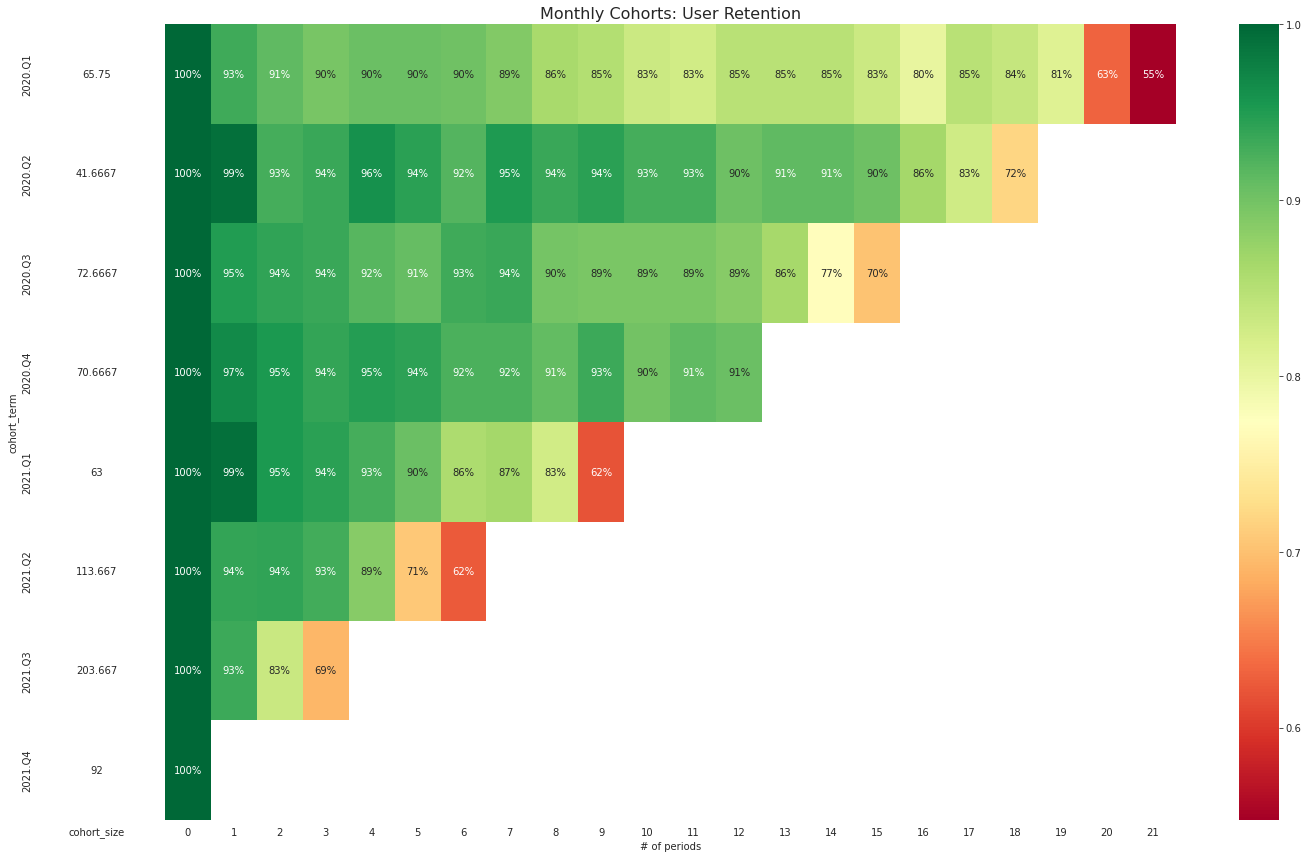

In [113]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [241]:
# as we can see, something has changed in 2021Q1
# retention rate started to increase, as we get to 60% at quicker rates
# probably at has to do something either with our product (e.g worse cashback options, which stimulates customers)
# or with uneffective CRM campaigns as well as acqusition channels (maybe we ran out of loyal customer segment)
# therefore we have to analyse what's the difference between early cohorts and late ones

In [114]:
# i want to see how retention rate is changing by generations
cohort_pivot_vint = df_cohort.pivot_table(index = 'period_number',
                                     columns = 'cohort_term',
                                     values = 'n_customers')

In [115]:
cohort_size_vint = cohort_pivot_vint.loc[0]
retention_matrix_vint = cohort_pivot_vint.divide(cohort_size_vint, axis = 1)

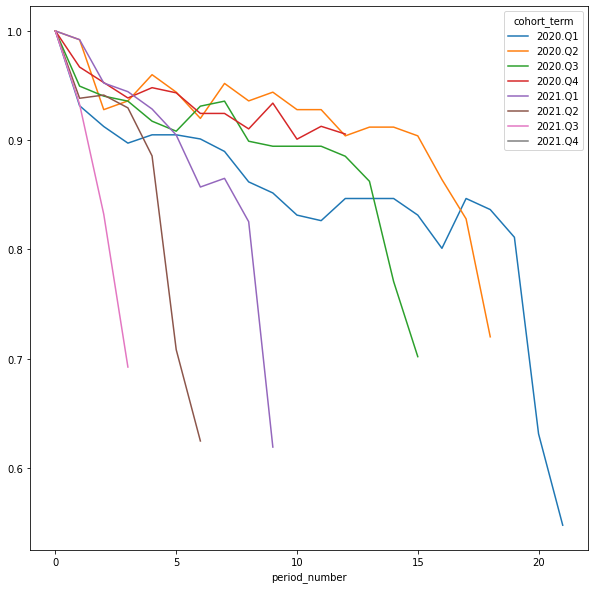

In [116]:
#plotting vintages
retention_matrix_vint.plot(figsize=(10,10))
plt.show()

In [ ]:
# the same conclusions apply to vintages 
# we can clearly see, that later generations are plummeting on earlier prediod of month
# further analysis with more information and data is required in order to figure out what happened